<a href="https://colab.research.google.com/github/thiagobarral/geomarketing/blob/main/geomarketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalando e importando as bibliotecas

In [1]:
!pip install sweetviz
!pip install verstack

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 69.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 21.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 348.5/348.5 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 50.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.7/155.7 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.3/71.3 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.6/80.6 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 MB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.2/147.2 kB 14.1 MB/s et

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import sweetviz as sv
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import expon as sp_expon
from scipy.stats import randint as sp_randint
from sklearn.svm import SVR, SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from google.colab import drive
from verstack import FeatureSelector

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Importando os dados

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!ls "/content/drive/My Drive/geofusion_data"

 DadosDesafioCientista.xlsx
'Desafio Técnico - Cientista de Dados.pdf'
 Previsaodefaturamentoepotencial.xlsx


In [6]:
fat_pot_df = pd.read_excel("/content/drive/My Drive/geofusion_data/DadosDesafioCientista.xlsx")

# Manipulando os dados

In [ ]:
fat_pot_df.head()

,codigo,nome,cidade,estado,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,...,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento,potencial
0,3304557060,Abolição,Rio de Janeiro,RJ,11676,1027,483,688,800,1675,...,145,715,1242,1093,758,92,304,2501.0,932515.0,Médio
1,3304557138,Acari,Rio de Janeiro,RJ,27564,5131,2188,2697,2630,4810,...,0,82,506,2040,2490,827,2506,931.0,588833.0,Baixo
2,3304557057,Água Santa,Rio de Janeiro,RJ,9003,883,399,597,762,1755,...,96,404,652,644,522,77,254,2391.0,874200.0,Baixo
3,3304557031,Alto Da Boa Vista,Rio de Janeiro,RJ,9606,1072,538,660,685,1317,...,178,393,517,945,584,137,286,3727.0,912226.0,Médio
4,3304557125,Anchieta,Rio de Janeiro,RJ,57222,7677,3774,4892,4600,8660,...,0,1089,2821,5110,5422,1073,3261,1380.0,553020.0,Médio


In [ ]:
fat_pot_df.dtypes

codigo            int64
nome             object
cidade           object
estado           object
população         int64
popAte9           int64
popDe10a14        int64
popDe15a19        int64
popDe20a24        int64
popDe25a34        int64
popDe35a49        int64
popDe50a59        int64
popMaisDe60       int64
domiciliosA1      int64
domiciliosA2      int64
domiciliosB1      int64
domiciliosB2      int64
domiciliosC1      int64
domiciliosC2      int64
domiciliosD       int64
domiciliosE       int64
rendaMedia       object
faturamento     float64
potencial        object
dtype: object

In [ ]:
fat_pot_df.describe()

,codigo,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,faturamento
count,4.560000e+02,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.00000,1.600000e+02
mean,1.321422e+09,41355.605263,5005.274123,2406.013158,3475.328947,3135.839912,6491.019737,9028.614035,5169.234649,6644.280702,405.583333,580.782895,1897.436404,2297.436404,3161.679825,2788.192982,689.153509,2191.58114,8.761600e+05
std,1.464724e+09,47188.920422,7655.796985,3617.925729,4571.058622,4030.380079,7012.670205,9277.870455,5676.876617,6929.255870,1044.795780,1074.031736,2130.830989,2138.179024,3453.936815,3441.066392,948.425756,2380.59873,4.382106e+05
min,3.550301e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,2.465100e+04
25%,3.550301e+08,14616.750000,1324.000000,604.250000,956.000000,1006.000000,2273.500000,3245.250000,1918.500000,2708.750000,0.000000,3.000000,559.750000,841.250000,934.000000,554.750000,96.500000,557.75000,7.112785e+05
50%,3.550302e+08,30352.000000,3074.000000,1434.000000,2173.000000,2196.000000,4774.000000,6710.500000,3951.500000,5264.500000,0.000000,198.500000,1334.000000,1833.000000,2229.000000,1632.500000,348.500000,1494.50000,8.242285e+05
75%,3.304557e+09,50879.250000,5962.000000,2884.000000,4307.500000,3762.750000,7828.500000,11272.750000,6620.500000,8745.500000,345.250000,757.500000,2500.500000,3222.250000,4153.250000,3679.500000,825.500000,2863.75000,9.343208e+05
max,3.304557e+09,667603.000000,122578.000000,55935.000000,62342.000000,60567.000000,86116.000000,105316.000000,83341.000000,91408.000000,13408.000000,11668.000000,19350.000000,21237.000000,33111.000000,25779.000000,6680.000000,15001.00000,2.915612e+06


In [ ]:
fat_pot_df.isna().sum()

codigo            0
nome              0
cidade            0
estado            0
população         0
popAte9           0
popDe10a14        0
popDe15a19        0
popDe20a24        0
popDe25a34        0
popDe35a49        0
popDe50a59        0
popMaisDe60       0
domiciliosA1      0
domiciliosA2      0
domiciliosB1      0
domiciliosB2      0
domiciliosC1      0
domiciliosC2      0
domiciliosD       0
domiciliosE       0
rendaMedia        6
faturamento     296
potencial       296
dtype: int64

In [ ]:
fat_pot_df.rendaMedia.str.isnumeric().notna().sum()

3

In [ ]:
t = fat_pot_df.rendaMedia.str.isnumeric().notna().to_numpy()
np.nonzero(t)

(array([232, 361, 376]),)

In [ ]:
fat_pot_df.iloc[[232,361,376]]

,codigo,nome,cidade,estado,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,...,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento,potencial
232,355030170,Eta Guaraú,São Paulo,SP,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-,NaN,NaN
361,355030227,Pico Do Jaraguá,São Paulo,SP,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-,NaN,NaN
376,355030167,Reserva Da Cantareira,São Paulo,SP,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-,NaN,NaN


In [7]:
fat_pot_df.rendaMedia.replace('-','', inplace = True)
fat_pot_df.rendaMedia = pd.to_numeric(fat_pot_df.rendaMedia)

In [8]:
#fat_pot_df = fat_pot_df.dropna(subset=['rendaMedia'])
fat_pot_df.rendaMedia.interpolate(method='linear', inplace=True)

In [9]:
fat_pot_rj = fat_pot_df[fat_pot_df['estado'] == 'RJ']
fat_pot_rj.drop(['codigo', 'cidade', 'estado'], axis=1, inplace = True)

In [10]:
fat_pot_sp = fat_pot_df[fat_pot_df['estado'] == 'SP']
fat_pot_sp.drop(['codigo', 'cidade', 'estado', 'faturamento', 'potencial'], axis=1, inplace = True)

In [ ]:
fat_pot_rj.groupby(['potencial']).sum()

,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento
potencial,,,,,,,,,,,,,,,,,,,
Alto,3680822,427791,198767,264021,279746,551489,740946,488485,729577,58206,83426,220727,222878,283908,207800,37141,116953,313355.0,56001880.0
Baixo,1063732,138723,64930,85876,89360,172103,225261,124516,162963,1162,4745,26385,53517,93658,92417,17849,60480,106732.0,48479904.0
Médio,2080142,286136,133814,173648,166795,329924,446091,240161,303573,2788,9152,52338,105217,188810,184712,35950,114025,149338.5,35703811.0


In [ ]:
fat_pot_rj.describe()

,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento
count,160.000000,160.00000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.00000,160.000000,160.000000,1.600000e+02
mean,42654.350000,5329.06250,2484.443750,3272.156250,3349.381250,6584.475000,8826.862500,5332.262500,7475.706250,388.475000,608.268750,1871.562500,2385.075000,3539.850000,3030.806250,568.37500,1821.612500,3558.909375,8.761600e+05
std,64262.949072,10816.19977,4948.827166,5752.156303,5601.893201,9049.895783,11536.276416,7986.261929,10258.307743,1403.605232,1535.237669,2973.530791,2779.071565,4324.539462,4003.047836,823.92034,2292.079295,5982.697693,4.382106e+05
min,173.000000,33.00000,13.000000,22.000000,17.000000,28.000000,38.000000,10.000000,12.000000,0.000000,0.000000,0.000000,0.000000,5.000000,3.000000,0.00000,2.000000,654.000000,2.465100e+04
25%,13362.750000,1512.75000,690.750000,945.000000,994.750000,2131.250000,2900.750000,1598.750000,2118.250000,0.000000,0.000000,391.500000,716.000000,1088.750000,789.750000,117.75000,431.500000,1492.000000,7.112785e+05
50%,26076.000000,3111.50000,1434.000000,2015.000000,2142.500000,4170.500000,5657.000000,3371.500000,4575.500000,0.000000,107.500000,848.000000,1536.000000,2394.500000,1861.500000,327.50000,1042.500000,1938.500000,8.242285e+05
75%,46504.500000,5622.25000,2621.500000,3448.750000,3451.750000,7145.250000,9586.750000,6333.250000,9196.000000,1.000000,430.500000,1962.500000,3065.750000,4203.000000,3652.500000,694.00000,2138.250000,2937.500000,9.343208e+05
max,667603.000000,122578.00000,55935.000000,62342.000000,60567.000000,86116.000000,105316.000000,83341.000000,91408.000000,13408.000000,11668.000000,19350.000000,21237.000000,33111.000000,25779.000000,4956.00000,14833.000000,63887.000000,2.915612e+06


# Visualizações

In [ ]:
fat_pot_rj_pop = fat_pot_rj.iloc[:, 3:12]
fat_pot_rj_pop.head()

,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2
0,483,688,800,1675,2300,1784,2919,0,145
1,2188,2697,2630,4810,5308,2403,2397,0,0
2,399,597,762,1755,2076,1112,1419,0,96
3,538,660,685,1317,2007,1341,1986,114,178
4,3774,4892,4600,8660,12272,7157,8190,0,0


<Axes: >

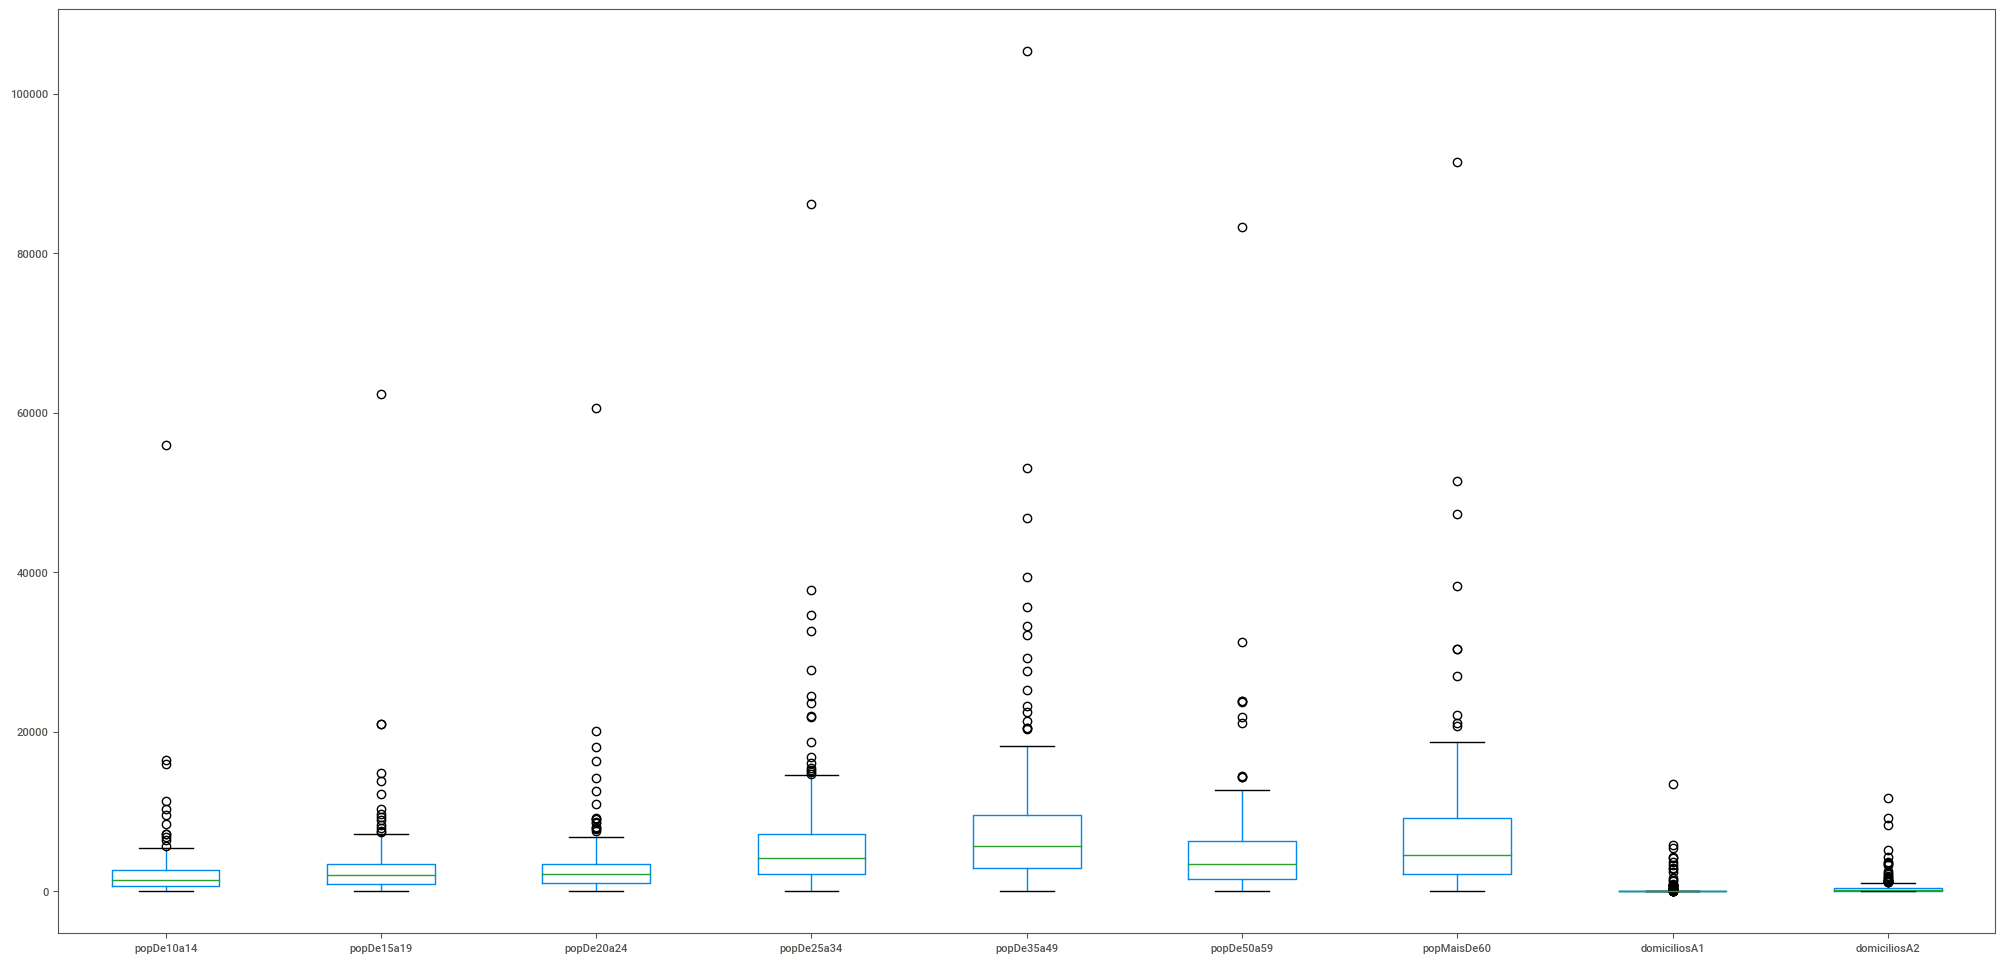

In [ ]:
fat_pot_rj_pop.boxplot(grid=False, figsize=(25, 12))

In [ ]:
fat_pot_rj_dom = fat_pot_rj.iloc[:, 13:20]
fat_pot_rj_dom.head()

,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento
0,1242,1093,758,92,304,2501.0,932515.0
1,506,2040,2490,827,2506,931.0,588833.0
2,652,644,522,77,254,2391.0,874200.0
3,517,945,584,137,286,3727.0,912226.0
4,2821,5110,5422,1073,3261,1380.0,553020.0


<Axes: >

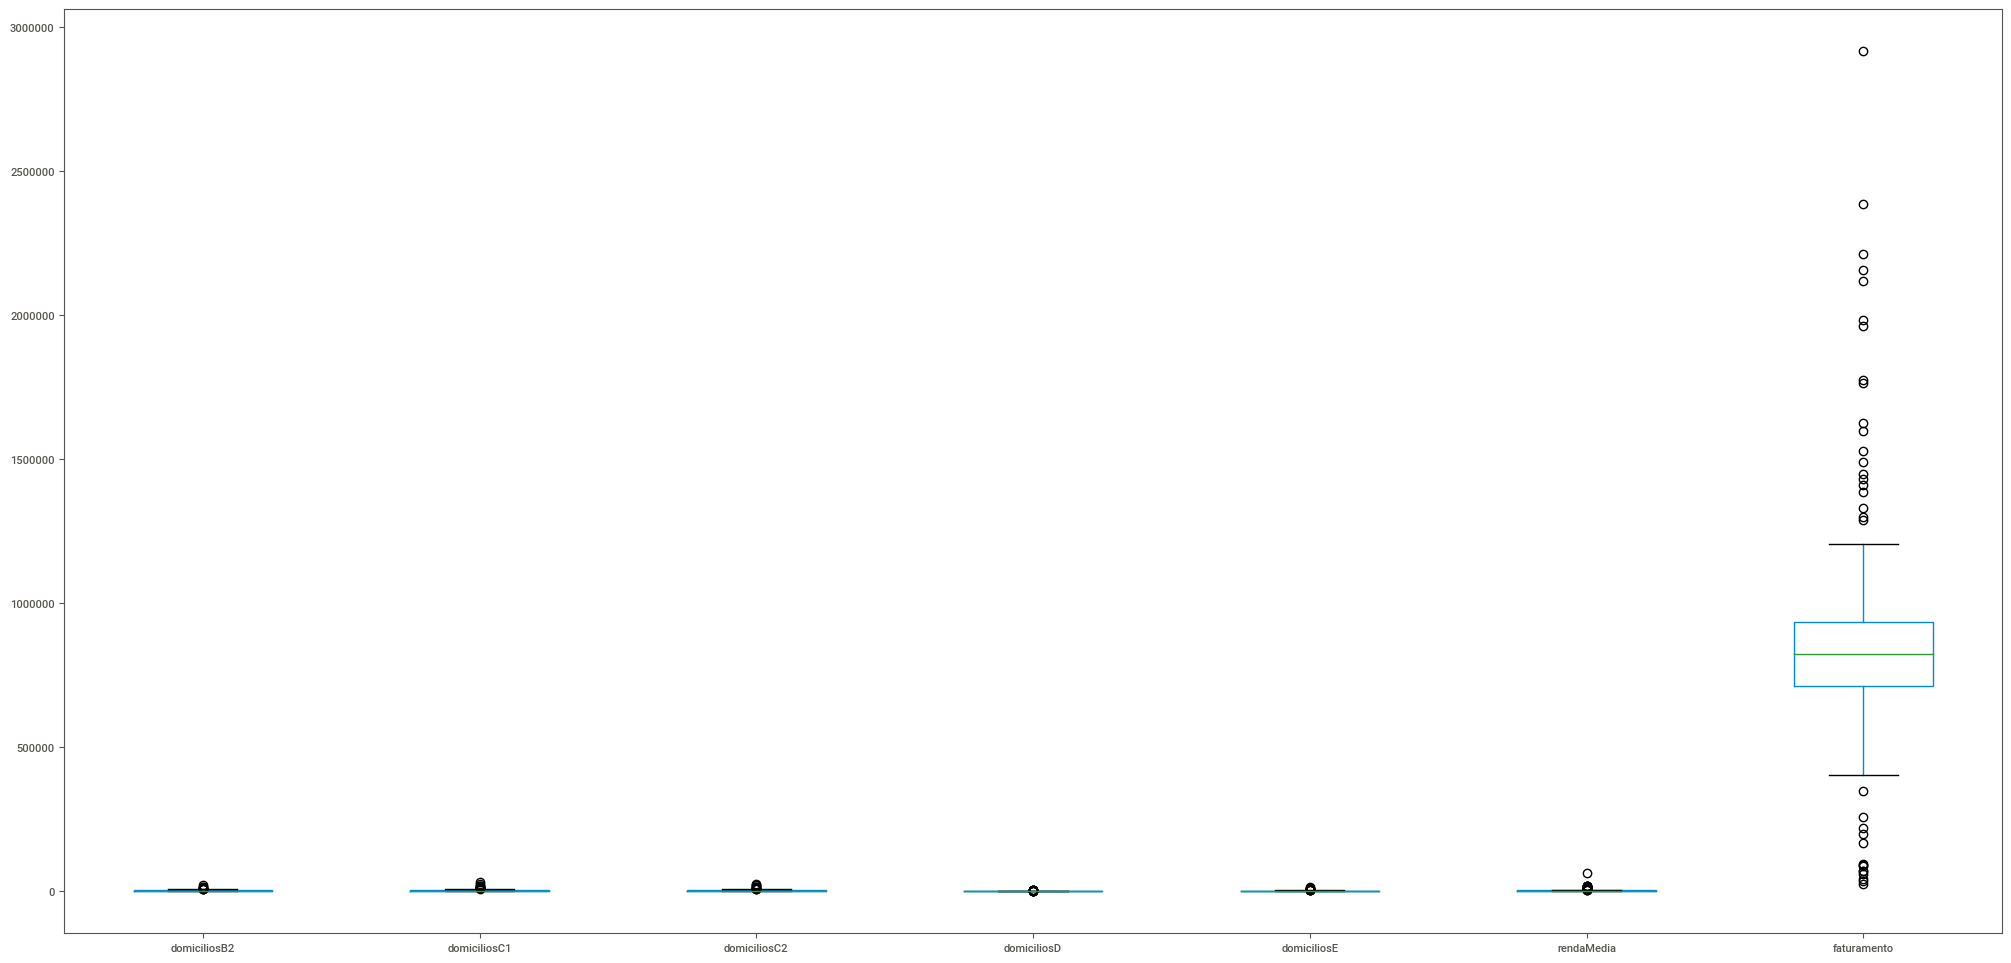

In [ ]:
fat_pot_rj_dom.boxplot(grid=False, figsize=(25, 12))

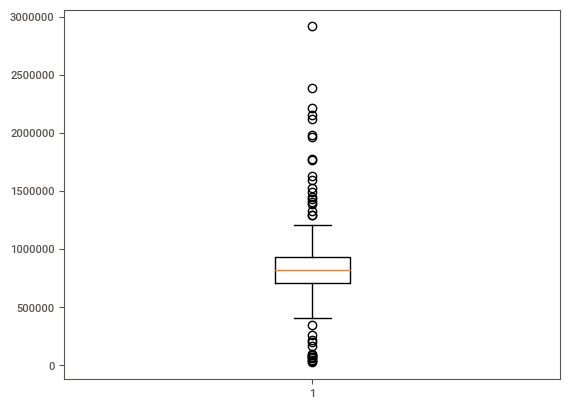

In [ ]:
plt.boxplot(fat_pot_rj.faturamento)
plt.show()

<Axes: >

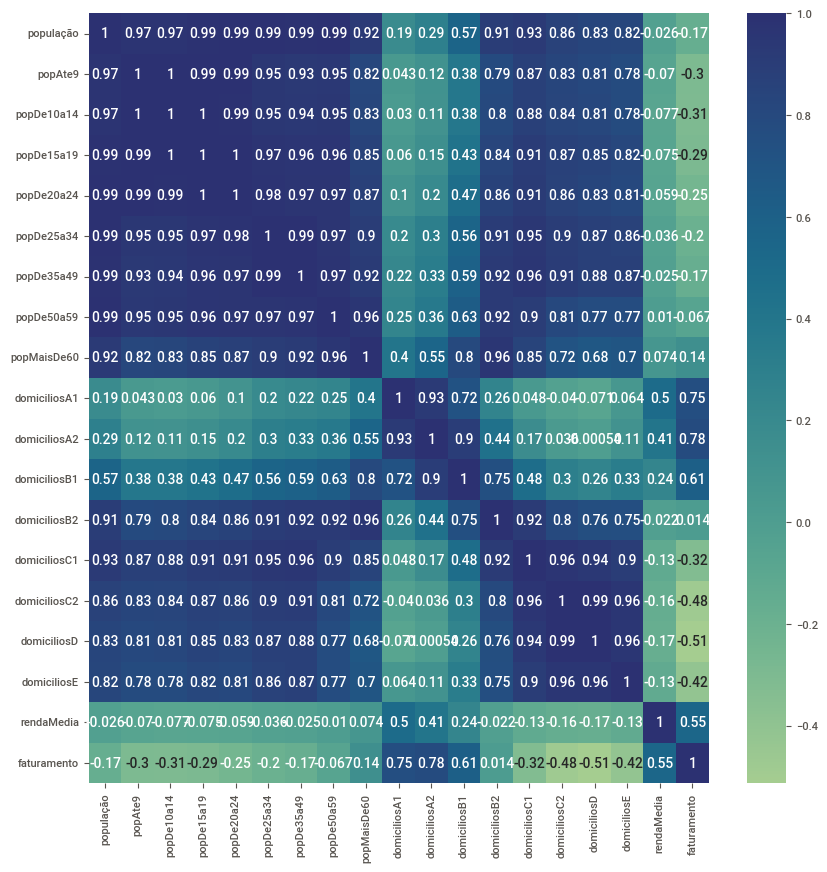

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(fat_pot_rj.corr(), annot=True, cmap='crest')

In [11]:
fat_pot_rj.drop(['população'], axis=1, inplace = True)
fat_pot_sp.drop(['população'], axis=1, inplace = True)

In [ ]:
# my_report_rj = sv.analyze(fat_pot_rj)
# my_report_rj.show_html('Análise do faturamento do Rio de Janeiro.html')

In [ ]:
# my_report_sp = sv.analyze(fat_pot_sp)
# my_report_sp.show_html('Análise do faturamento de São Paulo.html')

In [ ]:
my_report = sv.compare([fat_pot_rj, 'Rio de Janeiro'], [fat_pot_sp, 'São Paulo'])
my_report.show_html('Análise do faturamento comparativo.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Análise do faturamento comparativo.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Escolhendo o melhor modelo de regressão

In [12]:
fat_pot_rj_mr = fat_pot_rj.drop(['potencial', 'nome'], axis=1)

In [13]:
X = fat_pot_rj_mr.drop(columns = ['faturamento']).copy()
y = fat_pot_rj_mr['faturamento']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=7)

Linear Regression

In [ ]:
regr = LinearRegression()

In [ ]:
regr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = regr.predict(X_test)

In [ ]:
print("Coeficientes: \n", regr.coef_)
# Mean Squared Error
print("MSE: %.2f" % mean_squared_error(y_test, y_pred))
# Root Mean Squared Error
print("RMSE: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))
# Coeficiente de determinação R2
print("R2: %.2f" % r2_score(y_test, y_pred))

Coeficientes: 
 [  15.93432789 -167.35253427  171.18752122 -166.14724046  113.77641458
 -105.38543494  113.0473496   -25.4819271   -16.33091346   84.48454818
   41.71161591   67.88470679  -28.14622537  -23.53816523 -134.92968596
   31.3037263    34.25509372]
MSE: 58608373290.99
RMSE: 242091.66
R2: 0.65


Support Vector Regression

In [ ]:
# Fit regression model
svr = make_pipeline(StandardScaler(), SVR())
svr.fit(X_train, y_train)
# Predict
y_pred = svr.predict(X_test)
print(y_pred)

[809612.43813112 809604.20586264 809605.67512285 809616.91319026
 809613.18664315 809617.79125572 809617.59593529 809599.25819498
 809603.2767731  809609.34177624 809607.95880419 809612.64050498
 809607.43083785 809610.56289469 809607.70665863 809613.84752497
 809612.56907233 809609.4424687  809614.98802359 809608.248936
 809608.59908588 809612.55748402 809611.05619403 809614.17772023
 809611.63256987 809610.8649383  809607.98430747 809610.84018152
 809604.33462074 809619.28733889 809602.52031929 809612.93007033
 809608.66235562 809610.41791764 809614.66939369 809612.80607802
 809608.2968001  809613.88310959 809618.8761612  809616.31379951
 809610.71907803 809612.18557037 809606.36845827 809611.04418967
 809608.51272713 809611.91684405 809612.72412053 809604.26376719]


In [ ]:
# Mean Squared Error
print("MSE: %.2f" % mean_squared_error(y_test, y_pred))
# Root Mean Squared Error
print("RMSE: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))
# Coeficiente de determinação R2
print("R2: %.2f" % r2_score(y_test, y_pred))

MSE: 181633314458.22
RMSE: 426184.60
R2: -0.07


Decision Tree Regressor

In [ ]:
# Fit regression model
regr = DecisionTreeRegressor()
regr.fit(X_train, y_train)
# Predict
y_pred = regr.predict(X_test)
# Mean Squared Error
print("MSE: %.2f" % mean_squared_error(y_test, y_pred))
# Root Mean Squared Error
print("RMSE: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))
# Coeficiente de determinação R2
print("R2: %.2f" % r2_score(y_test, y_pred))

MSE: 17417038796.71
RMSE: 131973.63
R2: 0.90


# Automatic Feature Selection

In [19]:
#FS = FeatureSelector(objective = 'regression', auto = True)
selected_feats = FeatureSelector(objective = 'regression', seed = 13).fit_transform(X_train, y_train)


 * Initiating FeatureSelector

   - Running feature selection with RandomForestRegressor(max_depth=2, n_estimators=50)
     . Experiments are carried out on complete dataset
     . Selected 5 features from 17

Time elapsed for fit_transform execution: 4.42754 seconds


In [21]:
selected_feats = X_train[['popAte9', 'domiciliosA1', 'domiciliosA2', 'domiciliosD', 'domiciliosE']]

In [22]:
regr = DecisionTreeRegressor()
regr.fit(selected_feats,y_train)
X_test_afs = X_test[['popAte9', 'domiciliosA1', 'domiciliosA2', 'domiciliosD', 'domiciliosE']]
# Predict
y_pred = regr.predict(X_test_afs)
# Mean Squared Error
print("MSE: %.2f" % mean_squared_error(y_test, y_pred))
# Root Mean Squared Error
print("RMSE: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))
# Coeficiente de determinação R2
print("R2: %.2f" % r2_score(y_test, y_pred))

MSE: 16699518704.48
RMSE: 129226.62
R2: 0.90


# Otimizando o modelo modelo de regressão

In [ ]:
regr = DecisionTreeRegressor()
regr.fit(selected_feats, y_train)

In [23]:
param_grid = {
'min_samples_split': list(range(1,100)),
'min_samples_leaf': list(range(1, 100)),
'max_depth': list(range(2, 50))}
rnd_search = RandomizedSearchCV(regr, param_distributions = param_grid, n_iter=1000000000, cv=4, random_state=7)
rnd_search.fit(selected_feats,y_train)

RandomizedSearchCV(cv=4, estimator=DecisionTreeRegressor(), n_iter=1000000000,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, 31, ...],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14, 15, 16,
                                                             17, 18, 19, 20, 21,
                                                             22, 23, 24, 25, 26,
                                                             27, 28, 29, 30, ...],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9, 10, 11,
                                                              12, 13, 14, 15,
                                                              16, 17, 18, 19,
                                                              20, 21, 22, 23,
                                                              24, 25, 26, 27,
                                                              28, 29, 30, ...]},
                   random_state=7)

In [24]:
rnd_search.best_params_

{'min_samples_split': 4, 'min_samples_leaf': 1, 'max_depth': 20}

In [25]:
X_test_afs = X_test[['popAte9', 'domiciliosA1', 'domiciliosA2', 'domiciliosD', 'domiciliosE']]
# Predict
y_pred = rnd_search.predict(X_test_afs)
# Mean Squared Error
print("MSE: %.2f" % mean_squared_error(y_test, y_pred))
# Root Mean Squared Error
print("RMSE: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))
# Coeficiente de determinação R2
print("R2: %.2f" % r2_score(y_test, y_pred))

MSE: 14974154823.87
RMSE: 122368.93
R2: 0.91


In [ ]:
fat_pot_sp = fat_pot_sp[['popAte9', 'domiciliosA1', 'domiciliosA2', 'domiciliosD', 'domiciliosE']]

In [97]:
y_pred_DTR_sp = rnd_search.predict(fat_pot_sp)

# Escolhendo modelo de classificação

In [66]:
fat_pot_rj_mc = fat_pot_rj.drop(['faturamento', 'nome'], axis=1)

In [67]:
X = fat_pot_rj_mc.drop(columns = ['potencial']).copy()
y = fat_pot_rj_mc['potencial']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state = 10)

Logistic Regression

In [69]:
X_train = X_train[['popAte9', 'domiciliosA1', 'domiciliosA2', 'domiciliosD', 'domiciliosE']]
X_test = X_test[['popAte9', 'domiciliosA1', 'domiciliosA2', 'domiciliosD', 'domiciliosE']]

In [70]:
lgtic = make_pipeline(StandardScaler(), LogisticRegression())
lgtic.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [71]:
y_pred = lgtic.predict(X_test)

In [73]:
print(confusion_matrix(y_test, y_pred))

[[10  3  2]
 [ 0 14  2]
 [ 2  8  7]]


In [74]:
target_names = ['Baixo', 'Medio', 'Alto']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       Baixo       0.83      0.67      0.74        15
       Medio       0.56      0.88      0.68        16
        Alto       0.64      0.41      0.50        17

    accuracy                           0.65        48
   macro avg       0.68      0.65      0.64        48
weighted avg       0.67      0.65      0.64        48



k-Nearest Neighbors

In [75]:
neigh = make_pipeline(StandardScaler(), KNeighborsClassifier())
neigh.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [76]:
y_pred = neigh.predict(X_test)

In [77]:
print(confusion_matrix(y_test, y_pred))

[[12  2  1]
 [ 1 13  2]
 [ 2  5 10]]


In [78]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       Baixo       0.80      0.80      0.80        15
       Medio       0.65      0.81      0.72        16
        Alto       0.77      0.59      0.67        17

    accuracy                           0.73        48
   macro avg       0.74      0.73      0.73        48
weighted avg       0.74      0.73      0.73        48



In [40]:
nomes_sp = fat_pot_sp['nome']
fat_pot_sp.drop(['nome'], axis=1, inplace =True)

Support Vector Machines

In [79]:
clf = make_pipeline(StandardScaler(), SVC())
clf.fit(X_test, y_test)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [80]:
y_pred = clf.predict(X_test)

In [81]:
print(confusion_matrix(y_test, y_pred))

[[13  1  1]
 [ 1 14  1]
 [ 4  6  7]]


In [82]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       Baixo       0.72      0.87      0.79        15
       Medio       0.67      0.88      0.76        16
        Alto       0.78      0.41      0.54        17

    accuracy                           0.71        48
   macro avg       0.72      0.72      0.69        48
weighted avg       0.72      0.71      0.69        48



Random Forest Classifier

In [83]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[13  0  2]
 [ 0 14  2]
 [ 3  3 11]]


In [84]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       Baixo       0.81      0.87      0.84        15
       Medio       0.82      0.88      0.85        16
        Alto       0.73      0.65      0.69        17

    accuracy                           0.79        48
   macro avg       0.79      0.80      0.79        48
weighted avg       0.79      0.79      0.79        48



In [88]:
y_pred_RFC_sp = rfc.predict(fat_pot_sp)

# Salvando os aquivos

In [98]:
fat_pot_sp['faturamento'] = y_pred_DTR_sp

In [89]:
fat_pot_sp['potencial'] = y_pred_RFC_sp

In [99]:
fat_pot_sp['estado'] = 'SP'
fat_pot_rj['estado'] = 'RJ'

In [100]:
fat_pot_pred = pd.concat([fat_pot_rj, fat_pot_sp], axis=0)

In [101]:
fat_pot_pred.to_excel("/content/drive/My Drive/geofusion_data/Previsaodefaturamentoepotencial.xlsx")